# The Sparks Foundation GRIP - JAN 2022
# Role - Data Science and Business Analytics Intern
# Author - Archita K
# Beginner Level Task 2 - Prediction using Unsupervised ML

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [7]:
df.Species.nunique()

3

In [8]:
df.max()

Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [9]:
df.min()

Id                         1
SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [10]:
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing the dataset

In [14]:
df.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [15]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

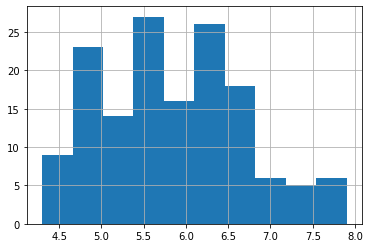

In [16]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

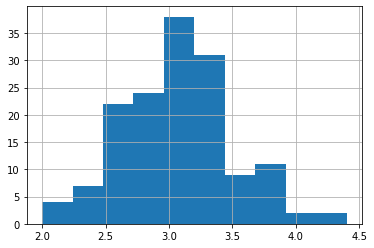

In [17]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

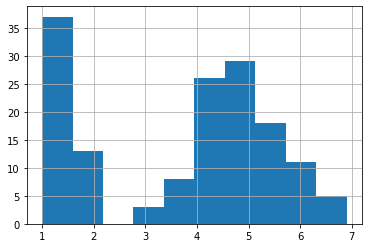

In [18]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

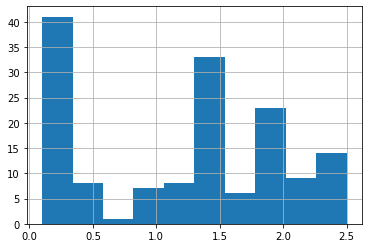

In [19]:
df['PetalWidthCm'].hist()

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

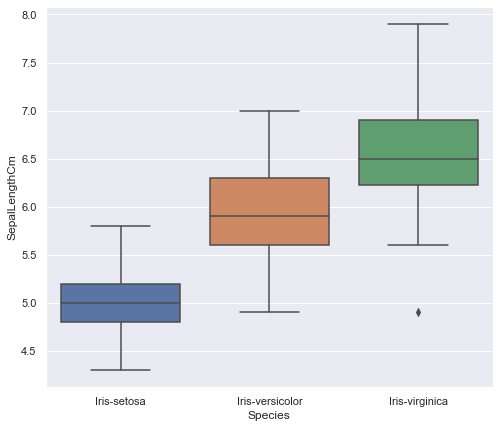

In [20]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='SepalLengthCm',data=df)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

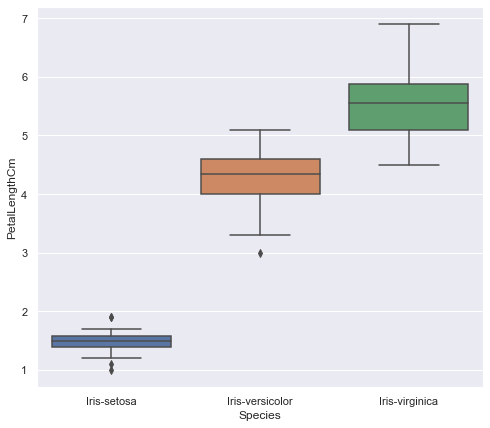

In [21]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='PetalLengthCm',data=df)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

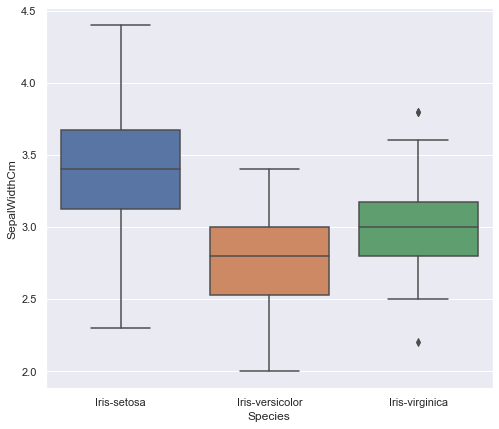

In [22]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='SepalWidthCm',data=df)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

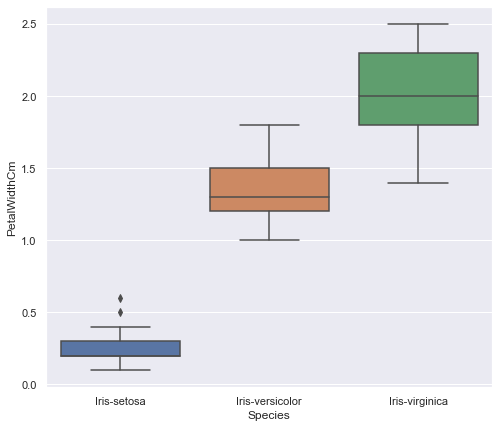

In [23]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='PetalWidthCm',data=df)

<AxesSubplot:ylabel='SepalLengthCm'>

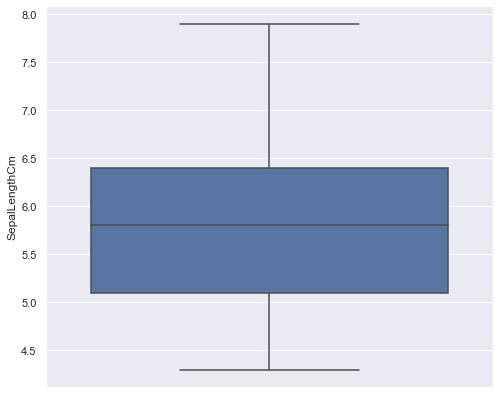

In [24]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(y='SepalLengthCm',data=df)

<AxesSubplot:ylabel='SepalWidthCm'>

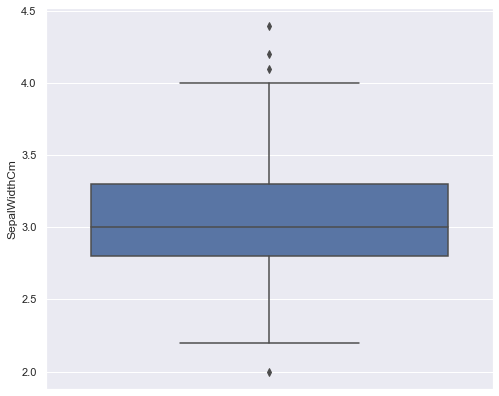

In [25]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(y='SepalWidthCm',data=df)

<AxesSubplot:ylabel='PetalLengthCm'>

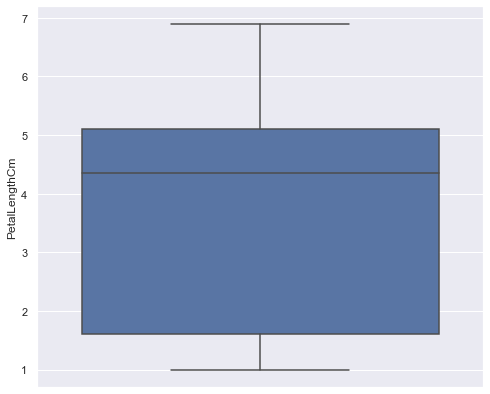

In [26]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(y='PetalLengthCm',data=df)

<AxesSubplot:ylabel='PetalWidthCm'>

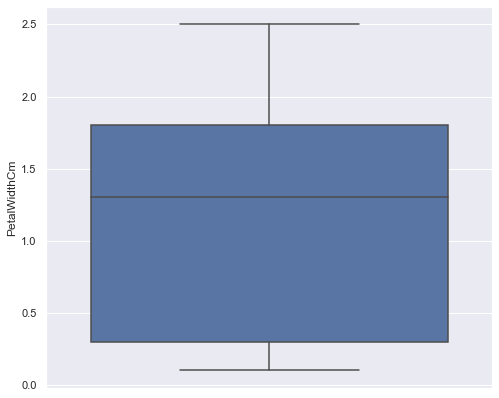

In [27]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(y='PetalWidthCm',data=df)

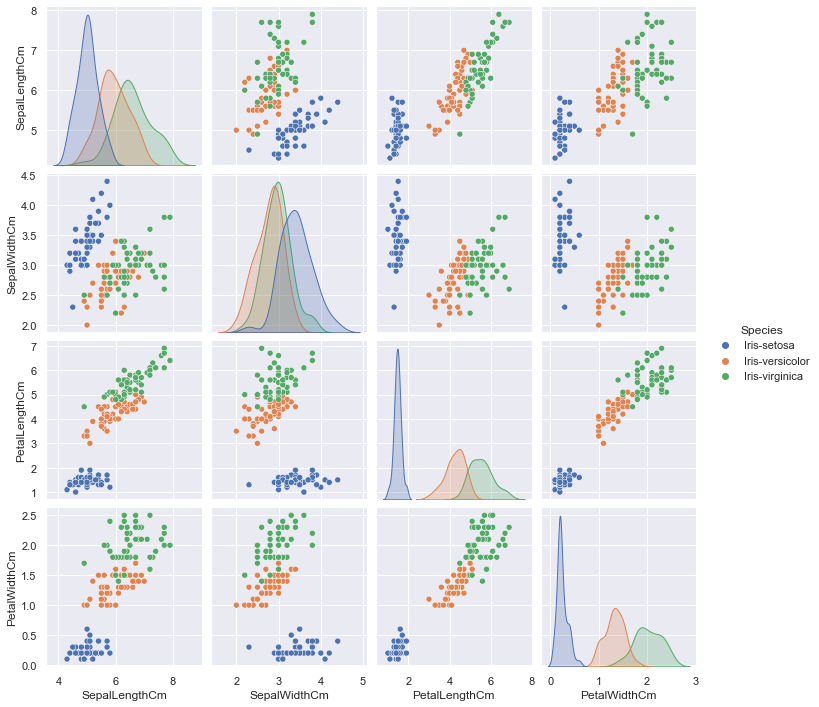

In [28]:
sns.pairplot(df,hue='Species')

In [29]:
colors = ['red', 'orange', 'blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

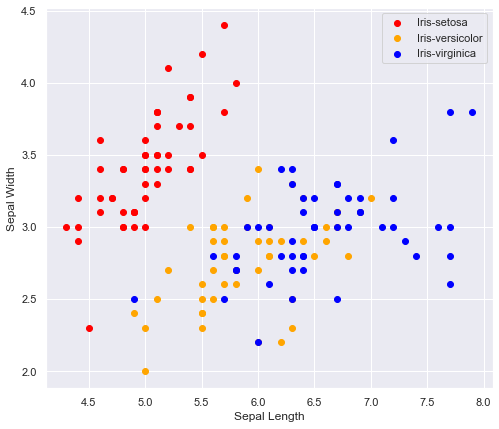

In [30]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x=x['SepalLengthCm'], y=x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

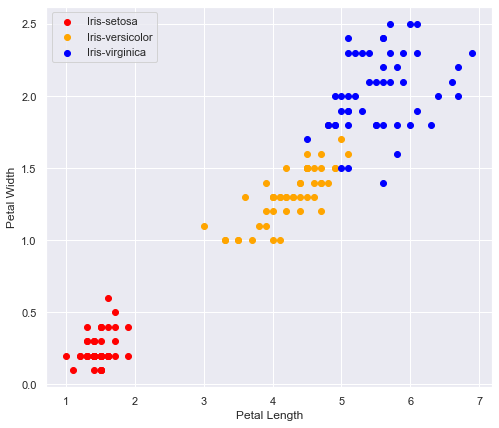

In [31]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x=x['PetalLengthCm'], y=x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

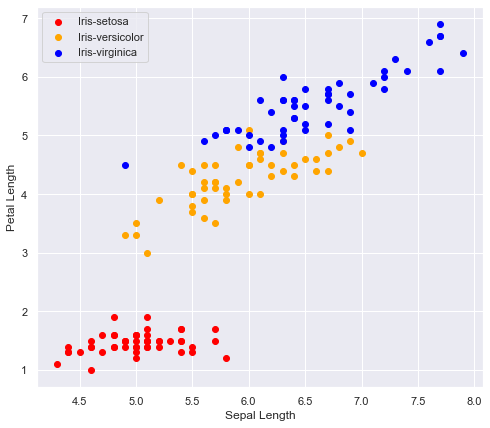

In [32]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x=x['SepalLengthCm'], y=x['PetalLengthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

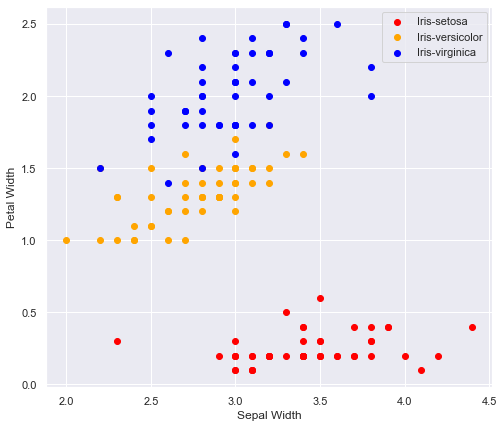

In [33]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x=x['SepalWidthCm'], y=x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Coorelation Matrix

In [34]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

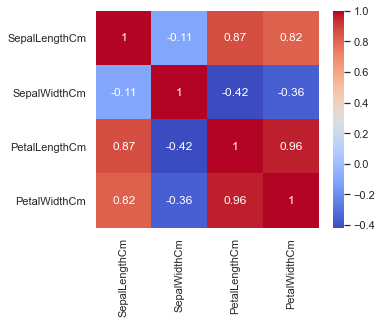

In [35]:
corr = df.corr()
plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Label Encoder

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Finding the Optimum Number of Clusters

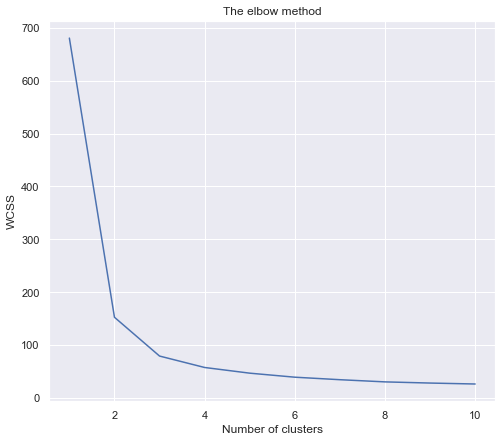

In [38]:
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [39]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

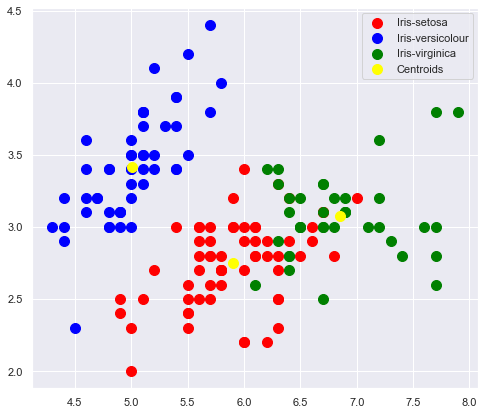

In [40]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

# Model Training

In [41]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Model Selection

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [43]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
svm = SVC()
nb = GaussianNB()

# Evaluating the models

In [44]:
models = [lr,dt,knn,rf,svm,nb]
scores=[]

for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, pred))
    print("Accuracy of "+type(model).__name__+" is",(accuracy_score(y_test, pred)))

Accuracy of LogisticRegression is 0.9777777777777777
Accuracy of DecisionTreeClassifier is 0.9555555555555556
Accuracy of KNeighborsClassifier is 0.9777777777777777
Accuracy of RandomForestClassifier is 0.9555555555555556
Accuracy of SVC is 0.9777777777777777
Accuracy of GaussianNB is 0.9333333333333333


In [45]:
final_result = pd.DataFrame({'Models':['Logistic Regression','Decision Tree Classifier','K-Nearest Neighbours','Random Forest','Support Vector Machine','Naive Bayes'],'Accuracy':scores})
final_result

,Models,Accuracy
0,Logistic Regression,0.977778
1,Decision Tree Classifier,0.955556
2,K-Nearest Neighbours,0.977778
3,Random Forest,0.955556
4,Support Vector Machine,0.977778
5,Naive Bayes,0.933333
